In [129]:
import pandas as pd
import numpy as np
import pickle
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection

In [144]:
output_feats = 'flat_neighbourhoods_1.csv'
df_iter = pd.read_csv(output_feats,header=None,index_col=0)
output_feats2 = 'flat_neighbourhoods_3.csv'
df_iter1 = pd.read_csv(output_feats,header=None,index_col=0)
df_iter = df_iter.append(df_iter1)
len(df_iter)

2880

In [145]:
#print(df_iter)
X_all = df_iter.iloc[:, :63]
y_all = df_iter.iloc[:, 63:]
print(len(X_all))
print(len(y_all))

2880
2880


In [146]:
X_all = StandardScaler().fit_transform(X_all)
X_sel,X_test, y_sel, y_test = \
        train_test_split(X_all, y_all, test_size=40,random_state=42)

print(len(X_sel),len(X_test))

2840 40


In [147]:
acc=[]
acc_it = []
ns = np.array([10,100,500,1000,1500,2000,2500,2800])
#ns = np.array([10,100,200])
for n in tqdm(ns):
    X_train = X_sel[:n]
    y_train = np.array(y_sel[:n]).ravel()
    #print(y_train)
    clf = MLPClassifier(hidden_layer_sizes = 1,alpha=1, max_iter=1000);
    clf.fit(X_train,y_train)
    wts = clf.coefs_
    #print(len(wts))
    WX = wts[0].transpose()*X_train
    #t.shape
    sig_X = 1/(1 + np.exp(-WX)) 
    #z.shape
    
    X_train_new = sig_X
    
    logr = LogisticRegression(max_iter=2000).fit(X_train_new,y_train)
    y_score = LogisticRegression(max_iter=2000).fit(X_train_new,y_train).decision_function(X_test)
    y_test_predict = logr.predict(X_test)
    acc.append(accuracy_score(y_test,y_test_predict))
    
    logr_model = Logit(y_train, X_train)
    logr1 = logr_model.fit_regularized(method='l1',max_iter=500,alpha=1.0)
    y_test_predict = logr1.predict(X_test)
    y_test_predict = np.rint(y_test_predict).astype(int)
    acc_it.append(accuracy_score(y_test,y_test_predict))
print(acc)
print(acc_it)

 12%|██████████▏                                                                      | 1/8 [00:00<00:00,  8.87it/s]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6931471805599453
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1


 25%|████████████████████▎                                                            | 2/8 [00:00<00:01,  4.29it/s]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6846129489274556
            Iterations: 48
            Function evaluations: 49
            Gradient evaluations: 48


 38%|██████████████████████████████▍                                                  | 3/8 [00:01<00:02,  2.23it/s]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6719963100730131
            Iterations: 131
            Function evaluations: 131
            Gradient evaluations: 131


 50%|████████████████████████████████████████▌                                        | 4/8 [00:03<00:03,  1.22it/s]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6621310157763829
            Iterations: 225
            Function evaluations: 225
            Gradient evaluations: 225


 62%|██████████████████████████████████████████████████▋                              | 5/8 [00:05<00:03,  1.21s/it]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.658831031440079
            Iterations: 274
            Function evaluations: 274
            Gradient evaluations: 274


 75%|████████████████████████████████████████████████████████████▊                    | 6/8 [00:07<00:03,  1.54s/it]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6604982273620206
            Iterations: 255
            Function evaluations: 256
            Gradient evaluations: 255


 88%|██████████████████████████████████████████████████████████████████████▉          | 7/8 [00:10<00:01,  1.99s/it]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6627978461291635
            Iterations: 300
            Function evaluations: 300
            Gradient evaluations: 300


100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.62s/it]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6605595733339878
            Iterations: 316
            Function evaluations: 317
            Gradient evaluations: 316
[0.525, 0.525, 0.55, 0.525, 0.475, 0.475, 0.525, 0.525]
[0.525, 0.575, 0.575, 0.6, 0.525, 0.625, 0.55, 0.525]


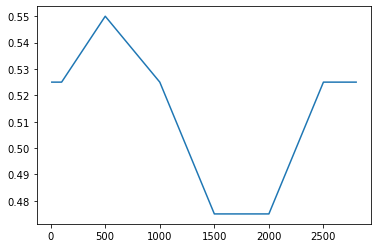

In [148]:
plt.plot(ns,acc)

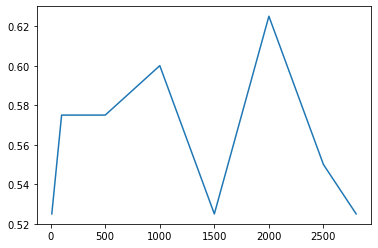

In [149]:
plt.plot(ns,acc_it)

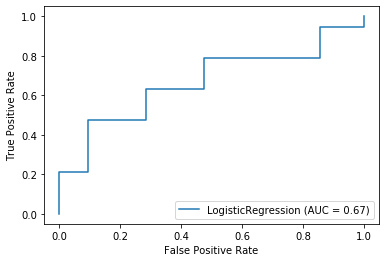

In [150]:
metrics.plot_roc_curve(logr, X_test, y_test)
plt.show() 